In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis, pearsonr
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

__import__('warnings').filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')

# Exploratory Data Analysis (EDA)

### 1. Variable identification

#### Train dataset

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [4]:
df_train.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

In [5]:
df_train.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [6]:
df_train.describe()

id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.000000    -0.300000    39.000000     2.000000     0.000000   
25%      17.700000    16.800000    77.000000    69.000000     0.400000   
50%      23.850000    22.150000    82.000000    83.000000     2.400000   
75%      26.400000    25.000000    88.000000    88.000000     6.800000   
max      29.800000    26.700000    98.000000   100.000000    12.100000   

       winddirection    windspeed     rainfall  
count    2190.000000  2190.000000  2190.000000  
mean      104.863151    21.804703     0.753425  
std        80.002416     9.898659     0.431116  
min        10.000000     4.400000     0.000000  
25%        40.000000    14.125000     1.000000  
50%        70.000000    20.500000     1.000000  
75%       200.000000    27.900000     1.000000  
max       300.000000    59.500000     1.000000

#### Test dataset

In [7]:
df_test.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0  2190    1    1019.5     17.5         15.8     12.7      14.9      96.0   
1  2191    2    1016.5     17.5         16.5     15.8      15.1      97.0   
2  2192    3    1023.9     11.2         10.4      9.4       8.9      86.0   
3  2193    4    1022.9     20.6         17.3     15.2       9.5      75.0   
4  2194    5    1022.2     16.1         13.8      6.4       4.3      68.0   

   cloud  sunshine  winddirection  windspeed  
0   99.0       0.0           50.0       24.3  
1   99.0       0.0           50.0       35.3  
2   96.0       0.0           40.0       16.9  
3   45.0       7.1           20.0       50.6  
4   49.0       9.2           20.0       19.4

In [8]:
df_test.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [9]:
df_test.describe()

id         day     pressure     maxtemp  temparature  \
count   730.000000  730.000000   730.000000  730.000000   730.000000   
mean   2554.500000  183.000000  1013.503014   26.372466    23.963288   
std     210.877136  105.438271     5.505871    5.672521     5.278098   
min    2190.000000    1.000000  1000.000000    7.400000     5.900000   
25%    2372.250000   92.000000  1008.725000   21.600000    19.825000   
50%    2554.500000  183.000000  1012.700000   27.800000    25.650000   
75%    2736.750000  274.000000  1017.600000   31.000000    28.375000   
max    2919.000000  365.000000  1032.200000   35.800000    31.800000   

          mintemp    dewpoint    humidity       cloud    sunshine  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean    22.110274   20.460137   82.669863   76.360274    3.664384   
std      5.170744    5.391169    7.818714   17.934121    3.639272   
min      4.200000   -0.000000   39.000000    0.000000    0.000000   
25%     17.825000   16.800000   77.250000   69.000000    0.325000   
50%     23.900000   22.300000   82.000000   83.000000    2.200000   
75%     26.400000   25.000000   89.000000   88.000000    6.675000   
max     29.100000   26.700000   98.000000  100.000000   11.800000   

       winddirection   windspeed  
count     729.000000  730.000000  
mean      103.923182   22.484247  
std        81.695458    9.954779  
min        10.000000    4.500000  
25%        40.000000   14.500000  
50%        70.000000   21.300000  
75%       200.000000   28.400000  
max       300.000000   59.500000

### 2. Univariate Analysis

In [10]:
def continuous_univariate_analysis(
    df: pd.DataFrame,
    column: str,
    figsize = (12, 4),
    bins = 30,
    show_outliers = True,
    quantile_range = (0.25, 0.75)
):
    if column not in df.columns:
        raise ValueError(f'{column} not in the dataframe')

    stats_columns = [
        'mean', 'median', 'std', 'min', 'max', 'IQR', 'skewness', 'kurtosis',
        'missing_count', 'missing_percentage', 'num_outliers', 'outlier_percentage'
    ]
    stats_df = pd.DataFrame(index=[column], columns=stats_columns)
    
    data = df[column].dropna()

    stats_df.loc[column, 'mean'] = df[column].mean()
    stats_df.loc[column, 'median'] = df[column].median()
    stats_df.loc[column, 'std'] = df[column].std()
    stats_df.loc[column, 'min'] = df[column].min()
    stats_df.loc[column, 'max'] = df[column].max()
    
    q1, q3 = np.percentile(data, [quantile_range[0]*100, quantile_range[1]*100])
    iqr = q3 - q1
    stats_df.loc[column, 'IQR'] = iqr
    stats_df.loc[column, 'skewness'] = skew(data)
    stats_df.loc[column, 'kurtosis'] = kurtosis(data)
    
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / len(df)) * 100
    stats_df.loc[column, 'missing_count'] = missing_count
    stats_df.loc[column, 'missing_percentage'] = missing_percentage

    lower_bound = q1 - 1.5 * iqr
    power_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > power_bound)]

    stats_df.loc[column, 'num_outliers'] = len(outliers)
    stats_df.loc[column, 'outlier_percentage'] = (len(outliers) / len(data)) * 100

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Histogram
    sns.histplot(data, bins=bins, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of column: {column}')
    axes[0].axvline(data.mean(), color='red', linestyle='--', label='Mean')
    axes[0].axvline(data.median(), color='green', linestyle='--', label='Median')
    axes[0].legend()
    
    # Boxplot
    sns.boxplot(x=data, ax=axes[1], showfliers=show_outliers)
    axes[1].set_title(f'Boxplot of column: {column}')
    
    stats_text = (
        f"Mean: {data.mean():.2f}\n"
        f"Median: {data.median():.2f}\n"
        f"Std: {data.std():.2f}\n"
        f"IQR: {iqr:.2f}\n"
        f"Skew: {skew(data):.2f}\n"
        f"Outliers: {len(outliers)} ({(len(outliers)/len(data)*100):.1f}%)"
    )
    axes[1].text(0.95, 0.95, stats_text, transform=axes[1].transAxes, 
                fontsize=9, va='top', ha='right', 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

#### day

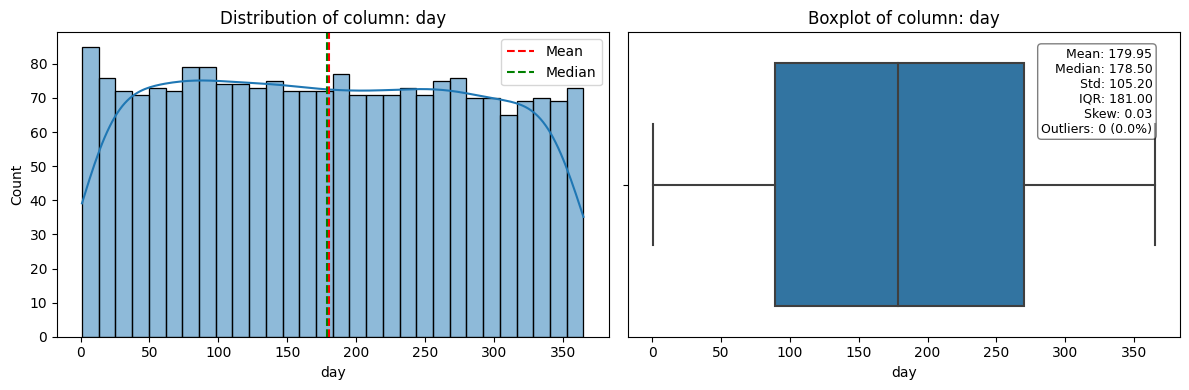

In [11]:
continuous_univariate_analysis(df_train, 'day')

#### pressure

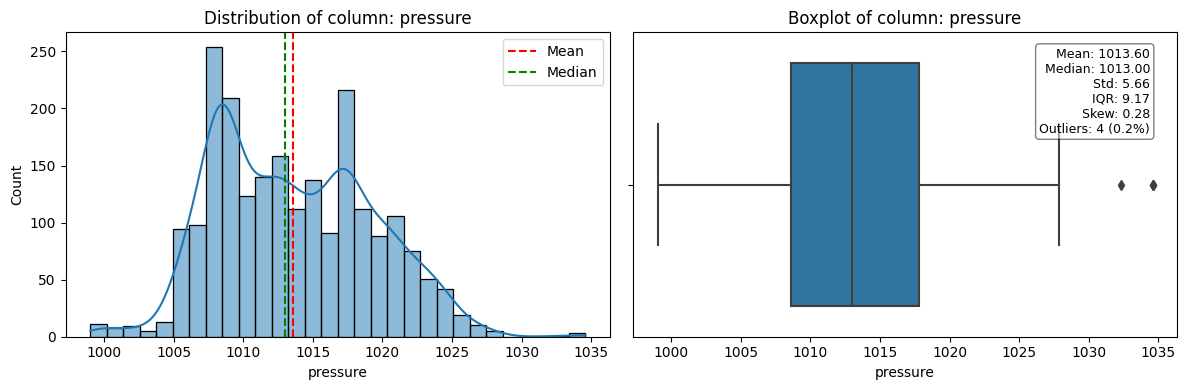

In [12]:
continuous_univariate_analysis(df_train, 'pressure')

#### maxtemp

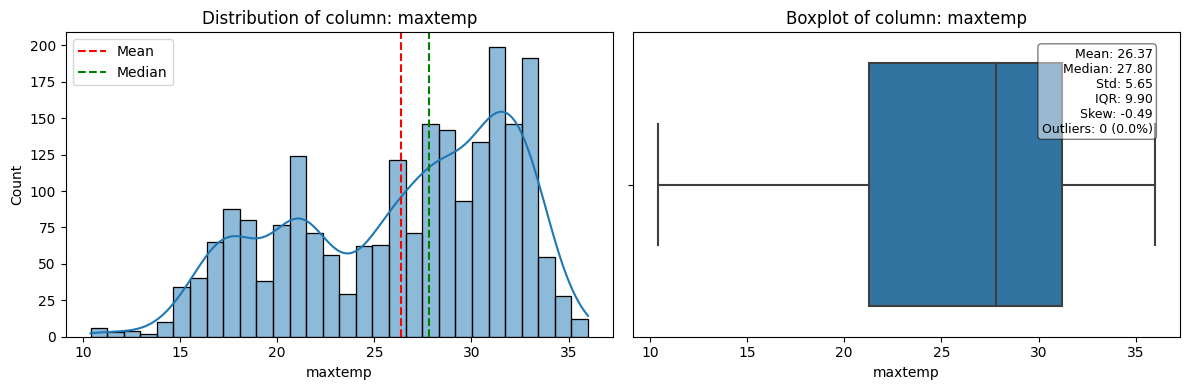

In [13]:
continuous_univariate_analysis(df_train, 'maxtemp')

#### temparature

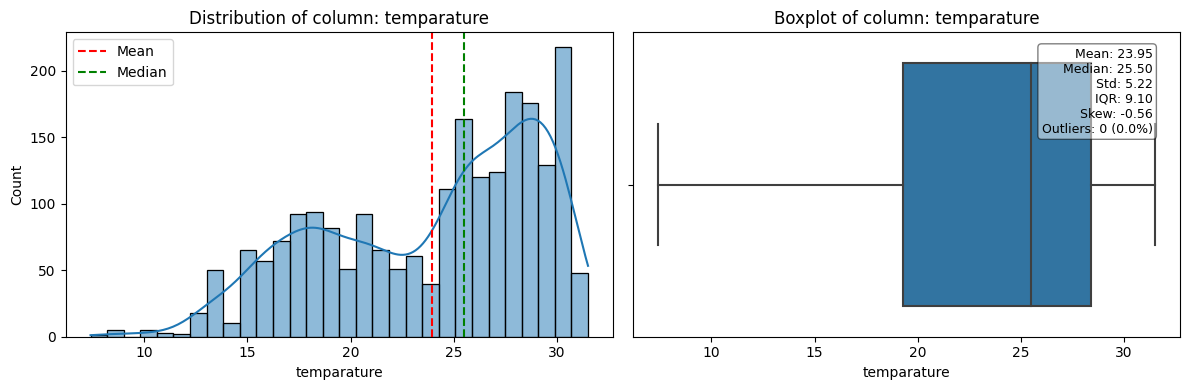

In [14]:
continuous_univariate_analysis(df_train, 'temparature')

#### mintemp

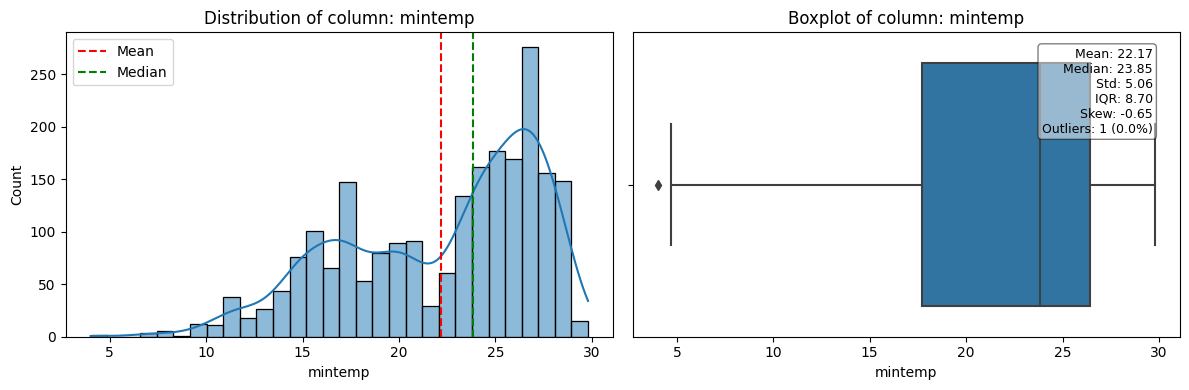

In [15]:
continuous_univariate_analysis(df_train, 'mintemp')

#### dewpoint

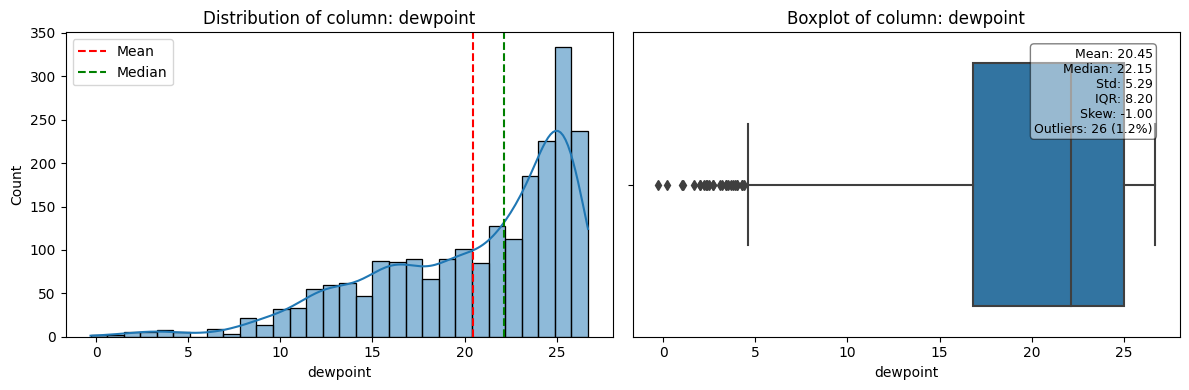

In [16]:
continuous_univariate_analysis(df_train, 'dewpoint')

#### humidity

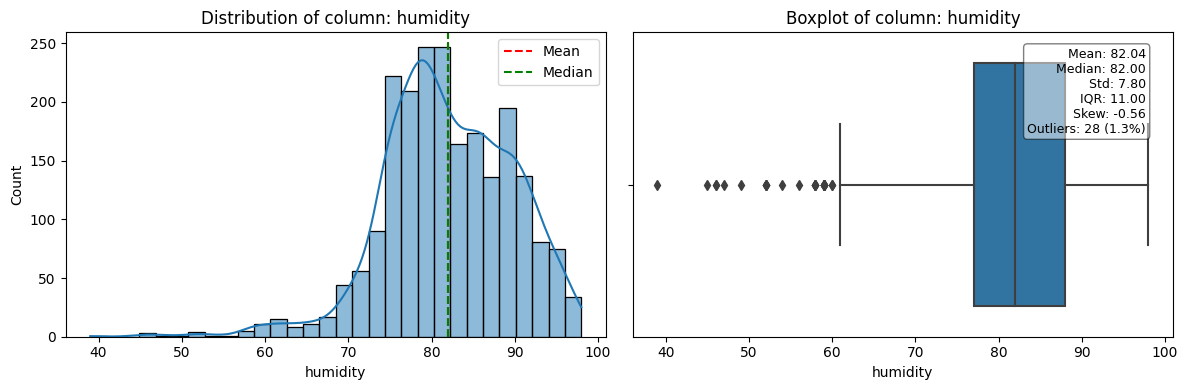

In [17]:
continuous_univariate_analysis(df_train, 'humidity')

#### cloud

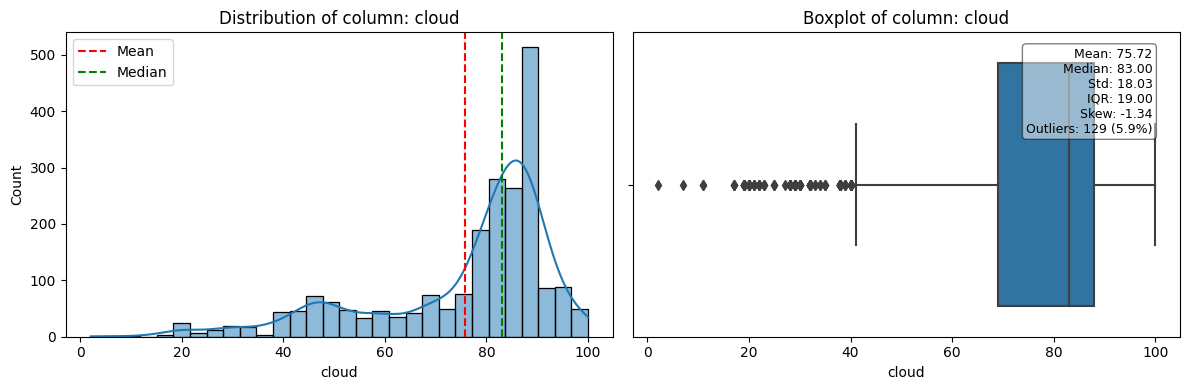

In [18]:
continuous_univariate_analysis(df_train, 'cloud')

#### sunshine

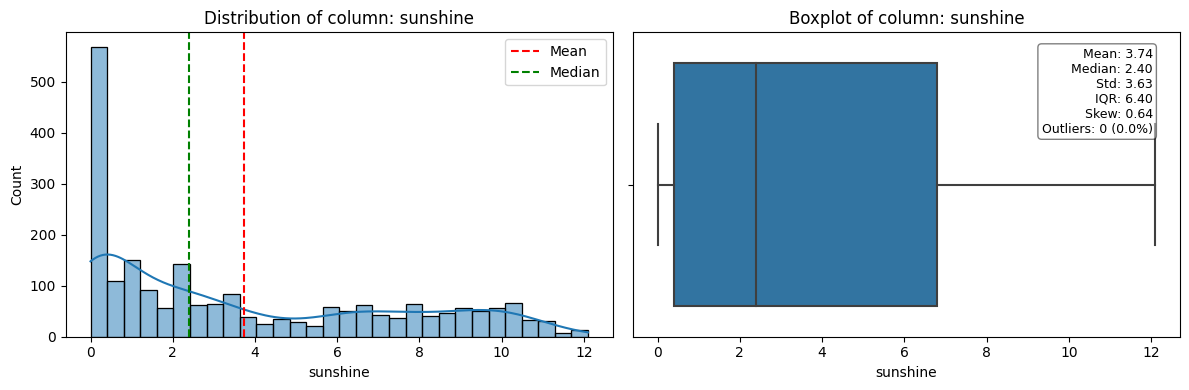

In [19]:
continuous_univariate_analysis(df_train, 'sunshine')

#### winddirection

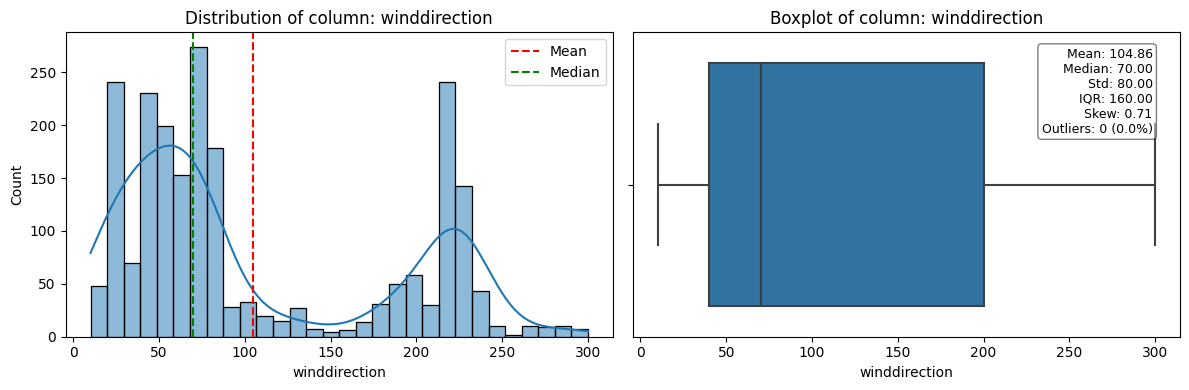

In [20]:
continuous_univariate_analysis(df_train, 'winddirection')

#### windspeed

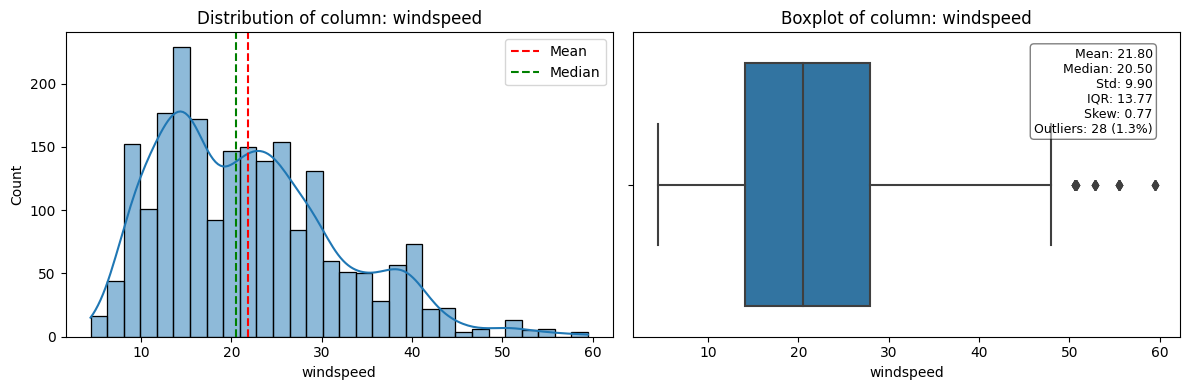

In [21]:
continuous_univariate_analysis(df_train, 'windspeed')

<Axes: >

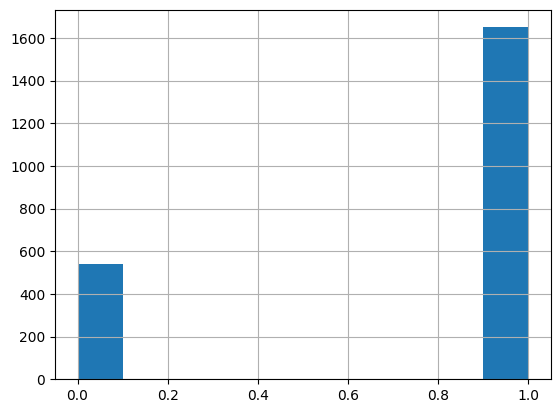

In [22]:
df_train['rainfall'].hist()

### 3. Outlier Treatment

In [23]:
def impute_outliers_using_iqr(df: pd.DataFrame, columns: list[str],*, factor: float = 1.5, visualize: bool = False) -> None:

    df_original = df.copy()
    df_imputed = df.copy()
    
    imputation_counts = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
    
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        outliers_lower = (df[col] < lower_bound).sum()
        outliers_upper = (df[col] > upper_bound).sum()
        imputation_counts[col] = {'lower': outliers_lower, 'upper': outliers_upper}
        
        df_imputed.loc[df_imputed[col] < lower_bound, col] = lower_bound
        df_imputed.loc[df_imputed[col] > upper_bound, col] = upper_bound
    
    if visualize and len(columns) > 0:

        n_cols, n_rows = 2, len(columns)
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
        
        for i, col in enumerate(columns):
        
            sns.boxplot(x=df_original[col], ax=axes[i, 0], orient='h')
            axes[i, 0].set_title(f'{col} - before imputation')
            axes[i, 0].set_xlabel('Value')
            
            sns.boxplot(x=df_imputed[col], ax=axes[i, 1], orient='h')
            axes[i, 1].set_title(f'{col} - after imputation')
            axes[i, 1].set_xlabel('Value')
            
            before_stats = (
                f"Mean: {df_original[col].mean():.2f}\n"
                f"Std: {df_original[col].std():.2f}\n"
                f"Min: {df_original[col].min():.2f}\n"
                f"Max: {df_original[col].max():.2f}"
            )
            
            after_stats = (
                f"Mean: {df_imputed[col].mean():.2f}\n"
                f"Std: {df_imputed[col].std():.2f}\n"
                f"Min: {df_imputed[col].min():.2f}\n"
                f"Max: {df_imputed[col].max():.2f}"
            )
            
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
            
            imputation_info = (
                f"lower bound: {lower_bound:.2f}\n"
                f"upper bound: {upper_bound:.2f}\n"
                f"imputed: {imputation_counts[col]['lower']} lower, "
                f"{imputation_counts[col]['upper']} upper"
            )
            
            axes[i, 0].text(0.02, 0.95, before_stats, transform=axes[i, 0].transAxes, 
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
            
            axes[i, 1].text(0.02, 0.95, after_stats, transform=axes[i, 1].transAxes, 
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
            
            axes[i, 1].text(0.02, 0.05, imputation_info, transform=axes[i, 1].transAxes, 
                           verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
            
        total_imputed = sum(d['lower'] + d['upper'] for d in imputation_counts.values())
        total_values = len(df) * len(columns)
        imputed_pct = 100 * total_imputed / total_values if total_values > 0 else 0
        
        plt.suptitle(
            f'outlier imputation (IQR method, factor={factor})\n'
            f'imputed {total_imputed} values ({imputed_pct:.1f}% of data points)', 
            fontsize=14
        )
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.95 if n_rows > 1 else 0.85)
        plt.show()
    
    return df_imputed

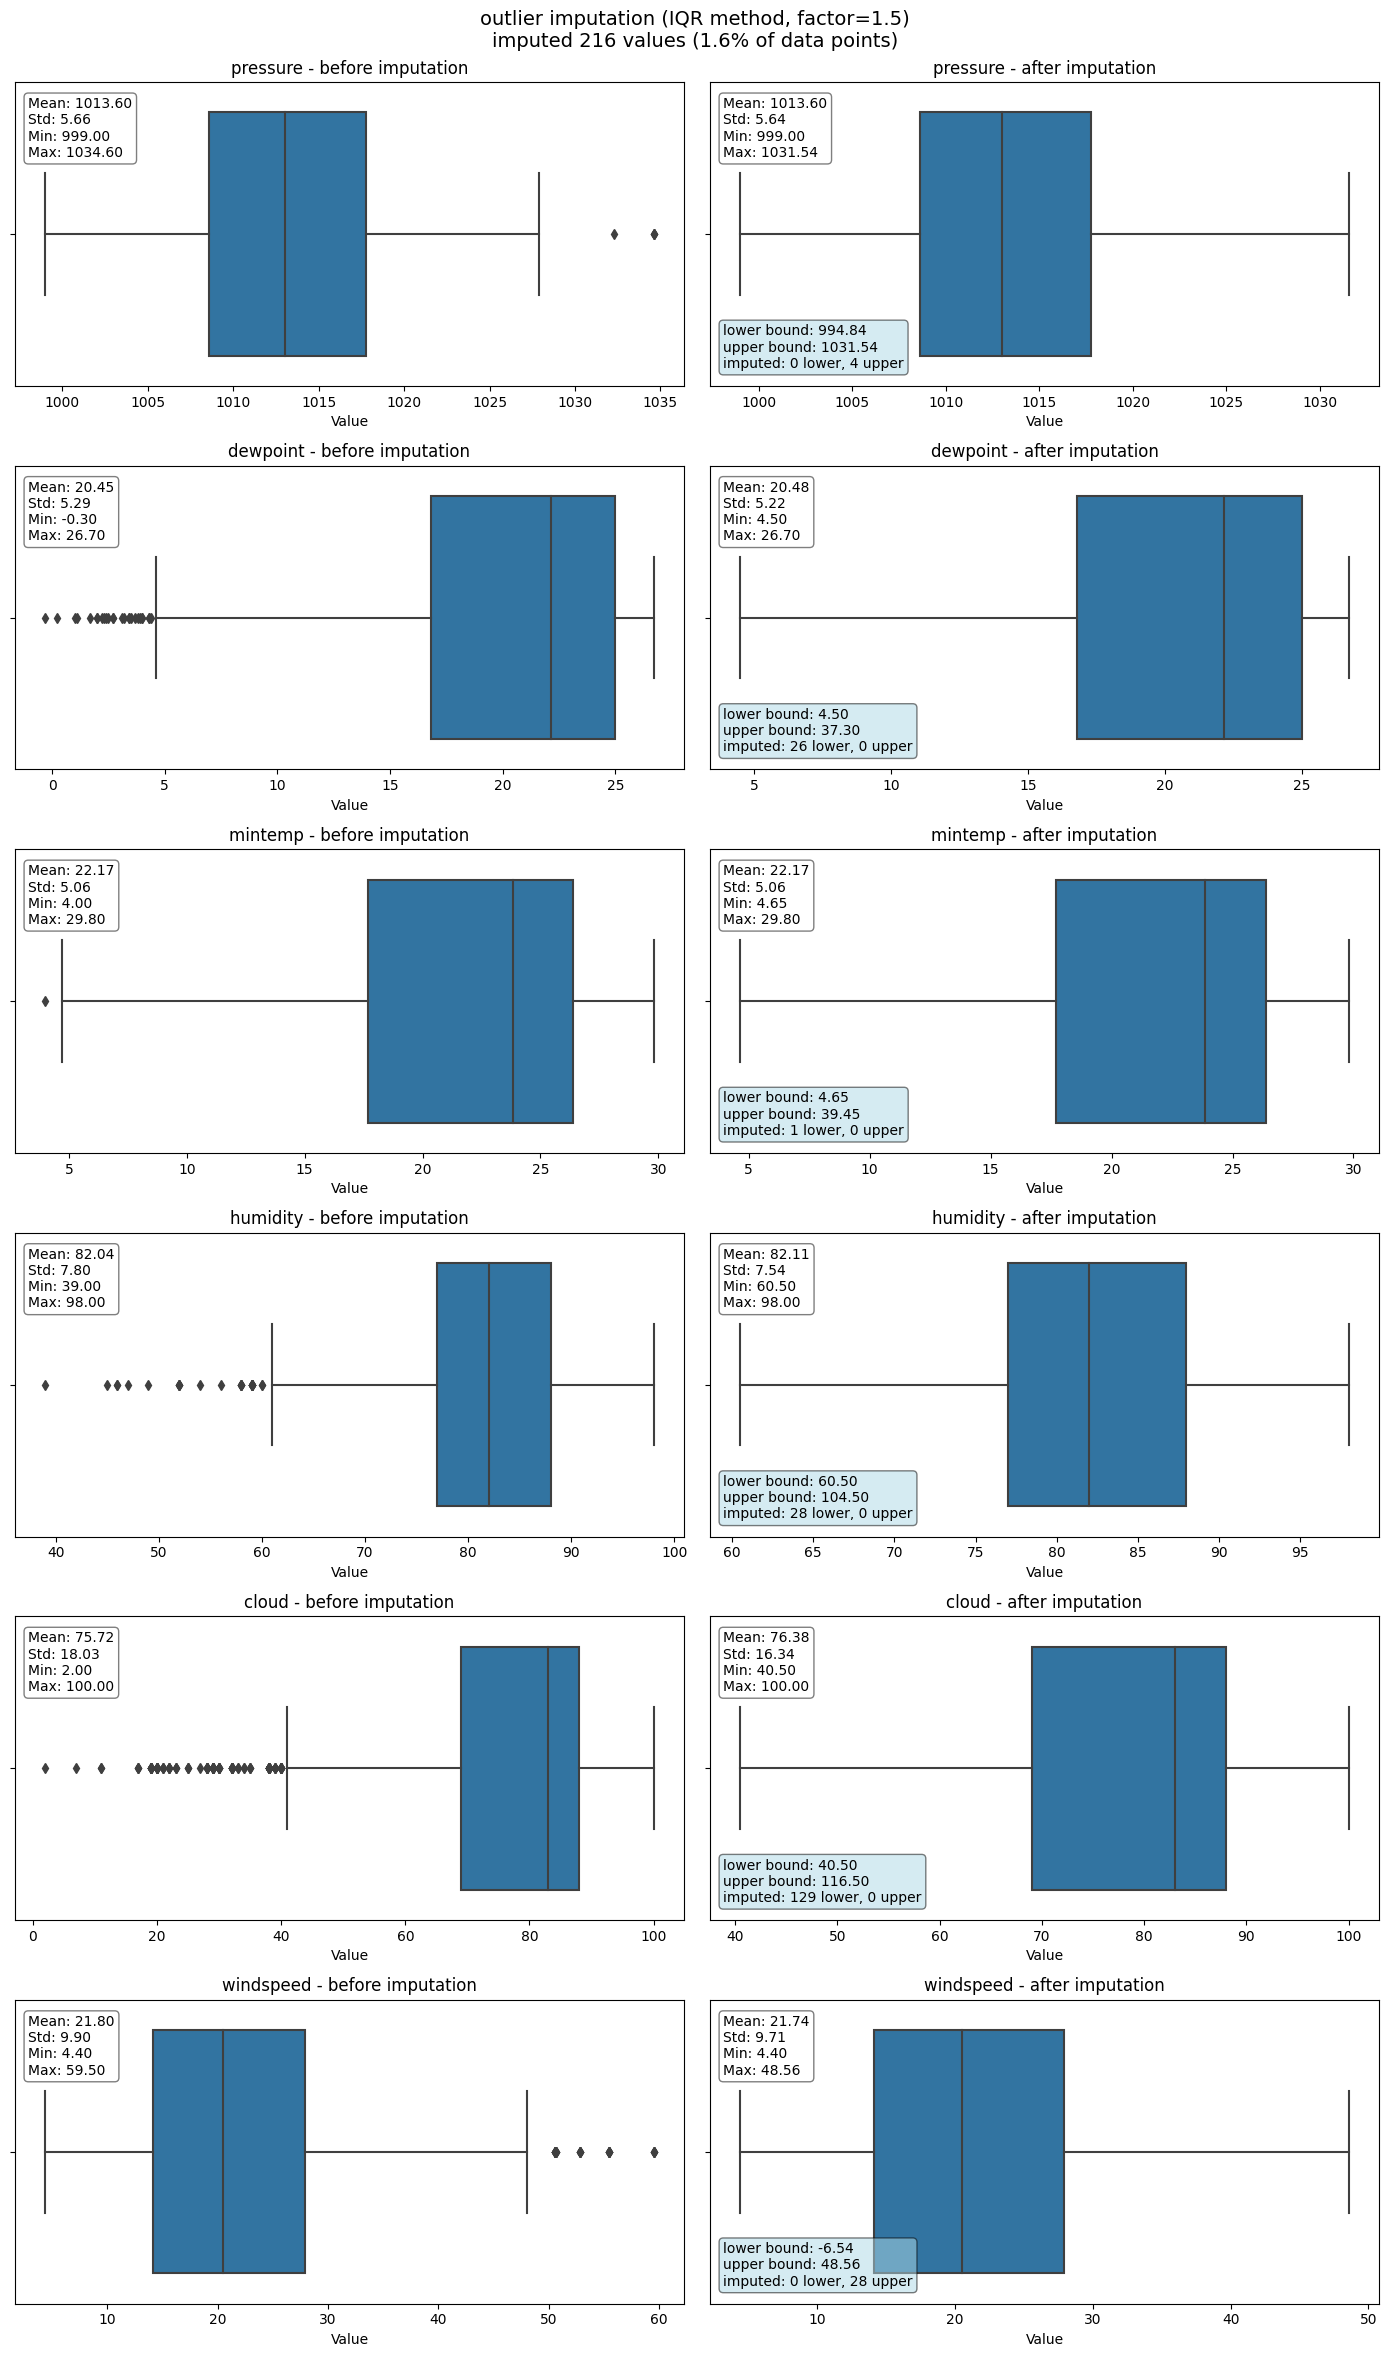

In [24]:
columns_with_outliers = ['pressure', 'dewpoint', 'mintemp', 'humidity', 'cloud', 'windspeed']
df_train_without_outliers = impute_outliers_using_iqr(df_train, columns_with_outliers, visualize=True)

### 4. Bivariate Analysis

In [25]:
def continuos_bivariate_analysis(df: pd.DataFrame, height: float = 2.5):
    sns.set_style('ticks')

    scatter_grid = sns.pairplot(
        df,
        diag_kind='kde',
        plot_kws={'alpha': 0.6, 'edgecolor': 'k'},
        height=height,
        corner=True
    )

    def annotate_corr(x, y, **kwargs):
        ax = kwargs.get('ax', plt.gca())
        r, _ = pearsonr(x, y)
        ax.annotate(f'r = {r:.2f}', xy=(0.1, 0.9), xycoords=ax.transAxes, fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))

    scatter_grid.map_lower(annotate_corr)

    plt.suptitle('Scatter Plot Matrix and Distributions', y=1.02, fontsize=24)

    plt.show()

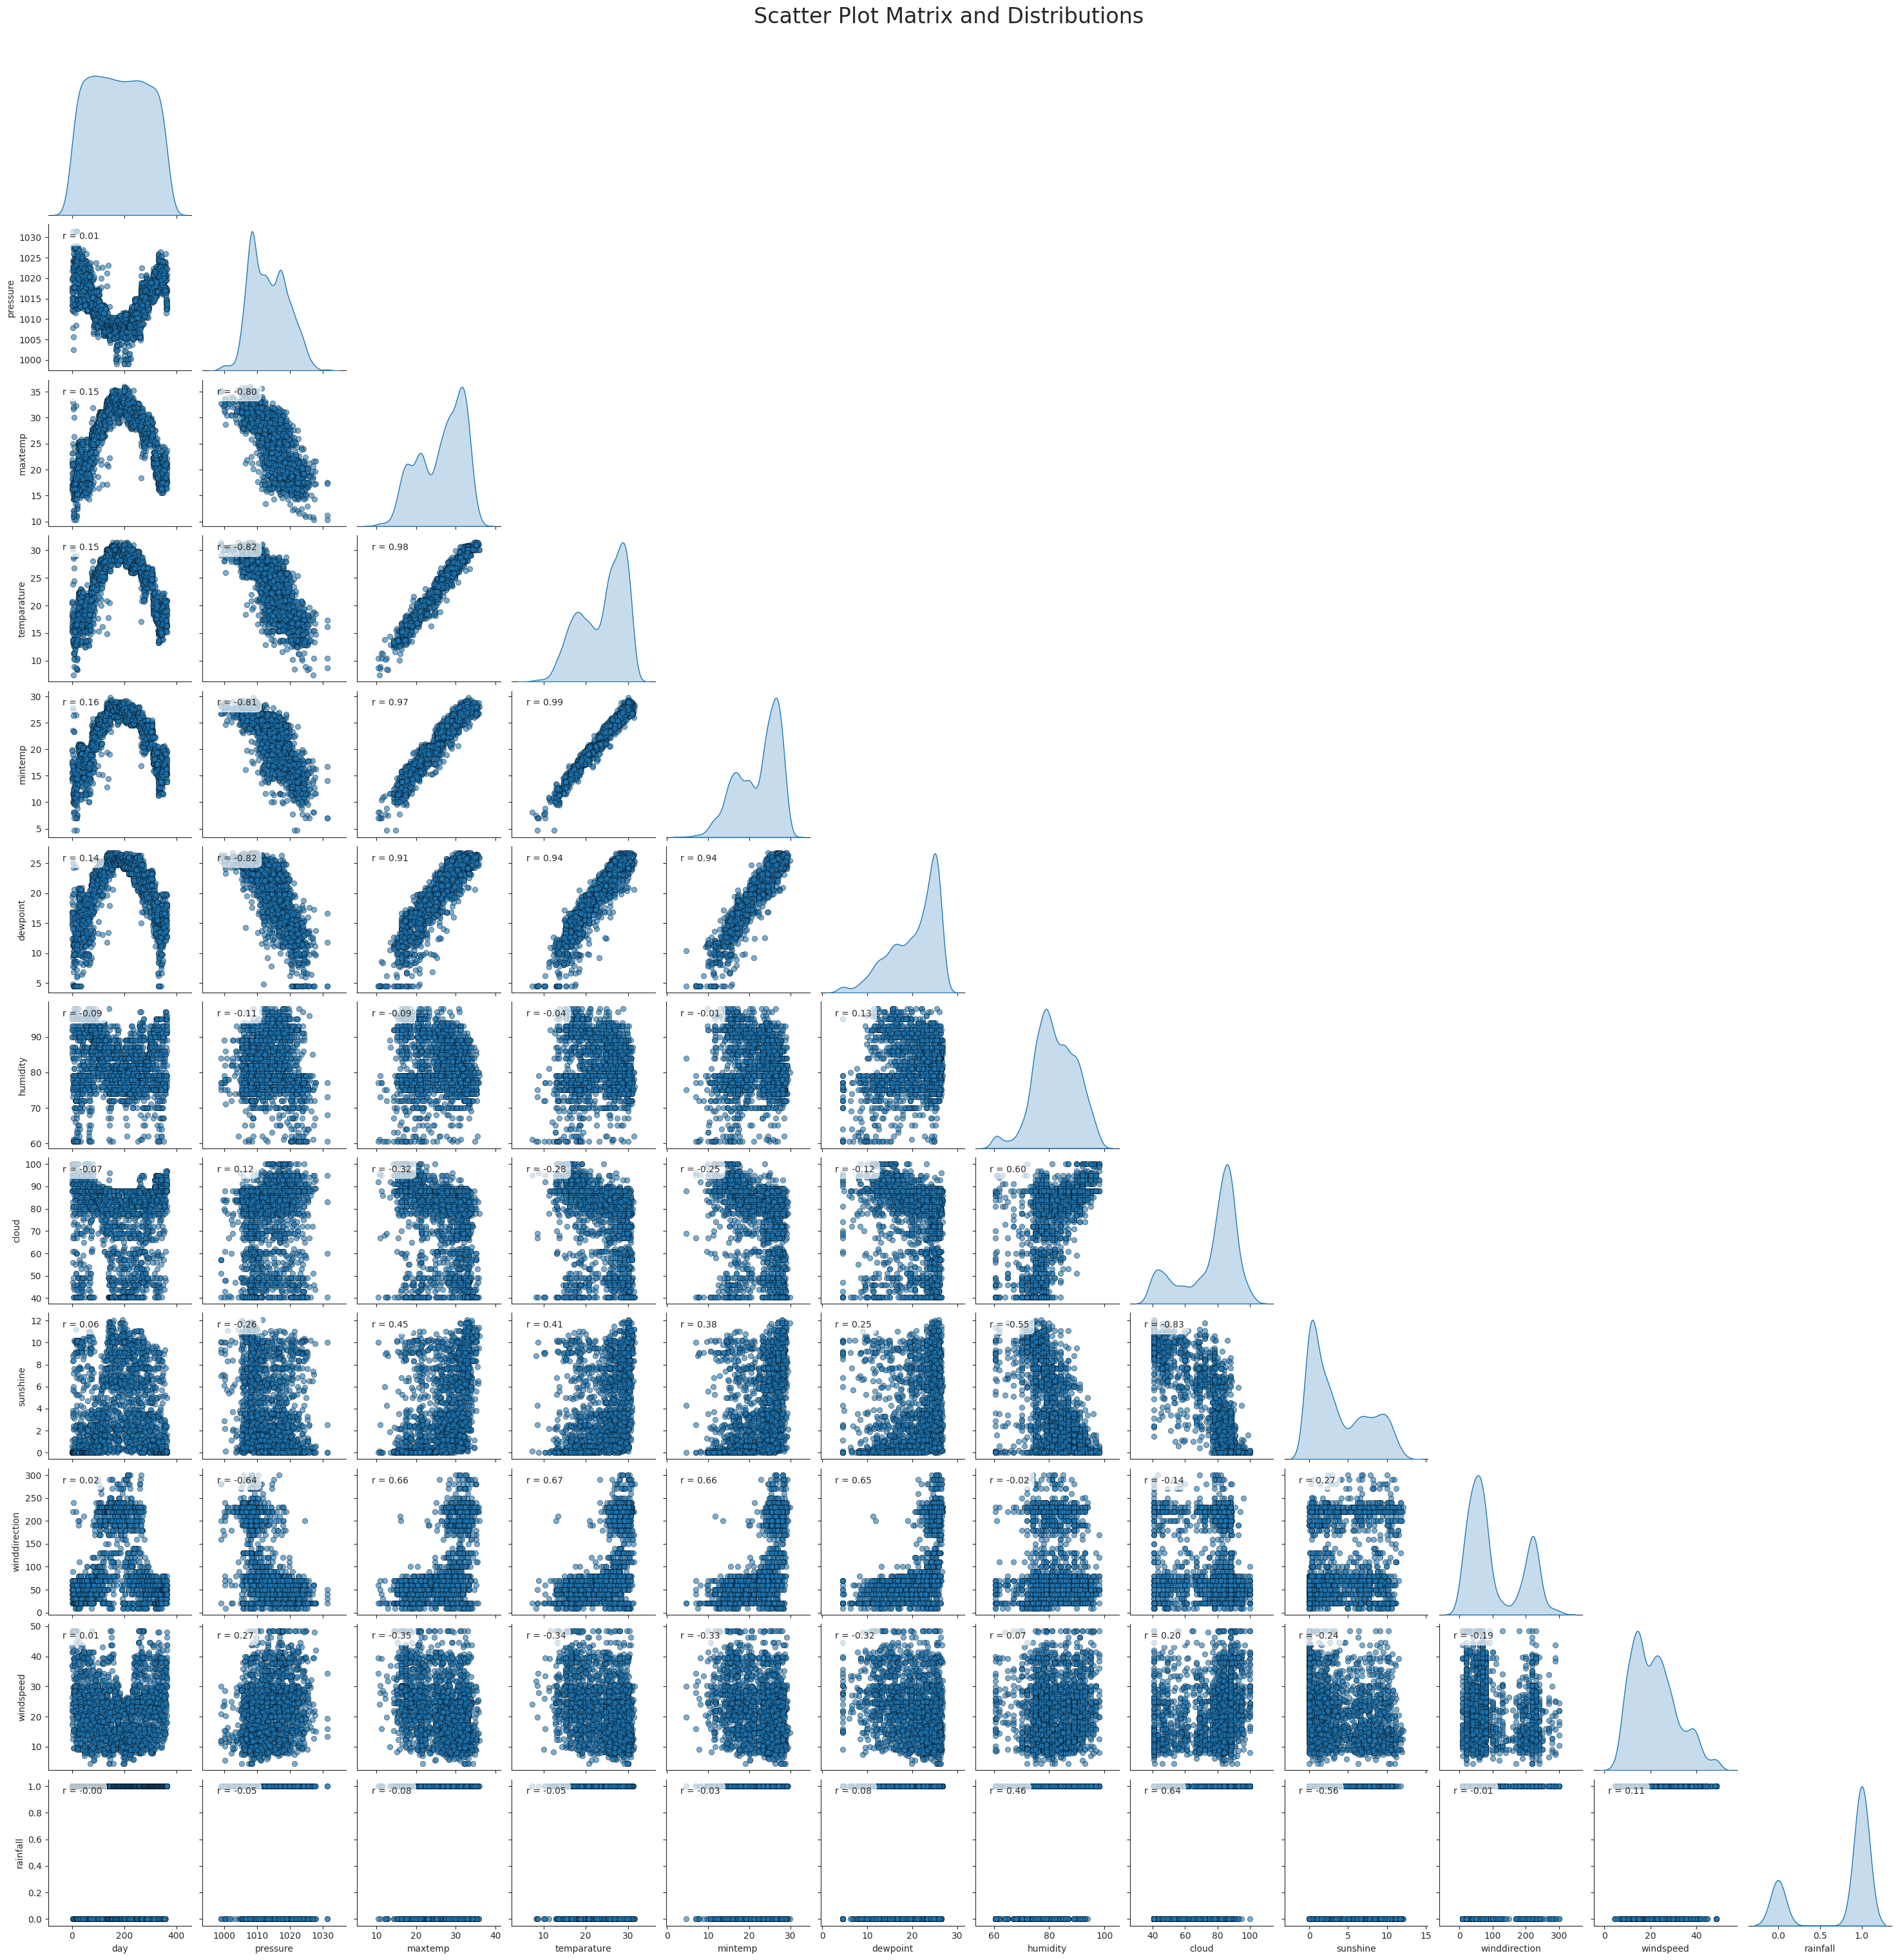

In [26]:
continuos_bivariate_analysis(df_train_without_outliers.drop('id', axis=1))

### 4. Missing Value Treatment

In [27]:
df_train.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [28]:
df_test.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [29]:
df_test['winddirection'] = df_test['winddirection'].fillna(df_test['winddirection'].mean())
df_test.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

### 6. Data Cleaning and Transformation

#### verify duplicates

In [30]:
df_train.duplicated(subset=['id']).sum()

0

In [31]:
df_test.duplicated(subset=['id']).sum()

0

#### scale continous variables

In [32]:
min_max_scaler = MinMaxScaler()
X_columns = [col for col in df_train.columns if col not in ['id', 'rainfall']]

df_train_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_train.drop(['id', 'rainfall'], axis=1)), columns=X_columns, index=df_train.index)
df_test_scaled = pd.DataFrame(min_max_scaler.transform(df_test.drop(['id'], axis=1)), columns=X_columns, index=df_test.index)

In [33]:
df_train_scaled.head()

day  pressure   maxtemp  temparature   mintemp  dewpoint  humidity  \
0  0.000000  0.516854  0.421875     0.547718  0.616279  0.729630  0.813559   
1  0.002747  0.575843  0.226562     0.394191  0.457364  0.581481  0.949153   
2  0.005495  0.705056  0.351562     0.360996  0.410853  0.355556  0.610169   
3  0.008242  0.404494  0.300781     0.431535  0.500000  0.633333  0.949153   
4  0.010989  0.640449  0.425781     0.456432  0.434109  0.366667  0.220339   

      cloud  sunshine  winddirection  windspeed  
0  0.877551  0.090909       0.172414   0.232305  
1  0.908163  0.000000       0.137931   0.317604  
2  0.459184  0.685950       0.206897   0.248639  
3  0.948980  0.000000       0.172414   0.566243  
4  0.438776  0.297521       0.103448   0.370236

In [34]:
df_test_scaled.head()

day  pressure   maxtemp  temparature   mintemp  dewpoint  humidity  \
0  0.000000  0.575843  0.277344     0.348548  0.337209  0.562963  0.966102   
1  0.002747  0.491573  0.277344     0.377593  0.457364  0.570370  0.983051   
2  0.005495  0.699438  0.031250     0.124481  0.209302  0.340741  0.796610   
3  0.008242  0.671348  0.398438     0.410788  0.434109  0.362963  0.610169   
4  0.010989  0.651685  0.222656     0.265560  0.093023  0.170370  0.491525   

      cloud  sunshine  winddirection  windspeed  
0  0.989796  0.000000       0.137931   0.361162  
1  0.989796  0.000000       0.137931   0.560799  
2  0.959184  0.000000       0.103448   0.226860  
3  0.438776  0.586777       0.034483   0.838475  
4  0.479592  0.760331       0.034483   0.272232

### 7. Multivariate Analysis

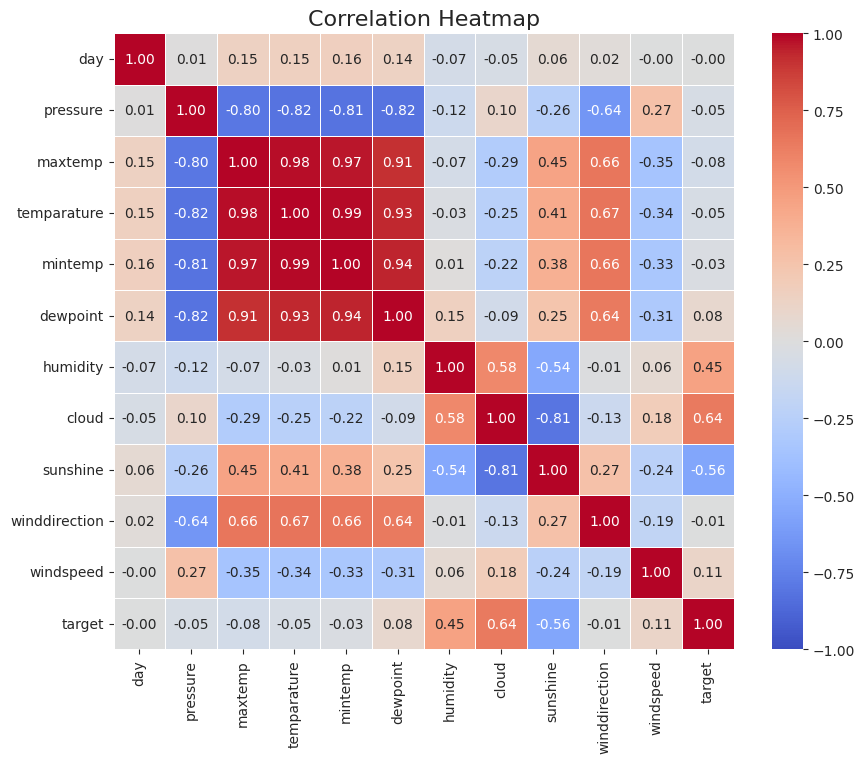

In [35]:
df_train_scaled['target'] = df_train['rainfall']

corr_matrix = df_train_scaled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    vmin=-1, vmax=1
)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

### 8. Feature Engineering and Selection

### 9. Modeling Considerations